<a href="https://colab.research.google.com/github/Jeonkyoungyong/bigdata/blob/main/12%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
raw_ca_df = pd.read_csv('/content/drive/MyDrive/12week/ca-coviddata.csv')
raw_ca_df.head()

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
0,01/23/2020,CA,01/16/2020,01/22/2020,0,0,0,0,0,0
1,01/30/2020,CA,01/23/2020,01/29/2020,2,2,0,0,0,0
2,02/06/2020,CA,01/30/2020,02/05/2020,8,6,0,0,0,0
3,02/13/2020,CA,02/06/2020,02/12/2020,16,8,0,0,0,0
4,02/20/2020,CA,02/13/2020,02/19/2020,30,14,0,0,0,0


In [5]:
#ca 캘리포니아 확진자 분석
ca_total_cases = raw_ca_df[['tot_cases', 'date_updated']]
ca_dateindex_df = ca_total_cases.set_index('date_updated')
ca_dateindex_df.head()

,tot_cases
date_updated,
01/23/2020,0
01/30/2020,2
02/06/2020,8
02/13/2020,16
02/20/2020,30


In [10]:
#tx 텍사스 확진자 분석
raw_tx_df = pd.read_csv('/content/drive/MyDrive/12week/tx-coviddata.csv')
tx_total_cases = raw_tx_df[['tot_cases', 'date_updated']]
tx_dateindex_df = tx_total_cases.set_index('date_updated')
tx_dateindex_df.head()

,tot_cases
date_updated,
01/23/2020,0
01/30/2020,0
02/06/2020,0
02/13/2020,0
02/20/2020,0


In [11]:
#va 버지니아 확진자 분석
raw_va_df = pd.read_csv('/content/drive/MyDrive/12week/va-coviddata.csv')
va_total_cases = raw_va_df[['tot_cases', 'date_updated']]
va_dateindex_df = va_total_cases.set_index('date_updated')
va_dateindex_df.head()

,tot_cases
date_updated,
01/23/2020,0
01/30/2020,0
02/06/2020,0
02/13/2020,0
02/20/2020,0


In [18]:
#il 일리노이 확진자 분석
raw_il_df = pd.read_csv('/content/drive/MyDrive/12week/il-coviddata.csv')
il_total_cases = raw_il_df[['tot_cases', 'date_updated']]
il_dateindex_df = il_total_cases.set_index('date_updated')
il_dateindex_df.head()

,tot_cases
date_updated,
01/23/2020,0
01/30/2020,1
02/06/2020,2
02/13/2020,2
02/20/2020,2


In [13]:
#wa 워싱턴 확진자 분석
raw_wa_df = pd.read_csv('/content/drive/MyDrive/12week/wa-coviddata.csv')
wa_total_cases = raw_wa_df[['tot_cases', 'date_updated']]
wa_dateindex_df = wa_total_cases.set_index('date_updated')
wa_dateindex_df.head()

,tot_cases
date_updated,
01/23/2020,1
01/30/2020,1
02/06/2020,1
02/13/2020,1
02/20/2020,1


In [19]:
#5개도시의 데이터프레임
ca_population = 38_965_193
tx_population = 30_000_000
va_population = 8_654_542
il_population = 12_600_000
wa_population = 7_730_000

tx_rate = round((tx_population / ca_population), 2)
va_rate = round((va_population / ca_population), 2)
il_rate = round((il_population / ca_population), 2)
wa_rate = round((wa_population / ca_population), 2)
print(tx_rate)
print(va_rate)
print(il_rate)
print(wa_rate)

0.77
0.22
0.32
0.2


In [20]:
#index 를 datetime으로 변환
ca_dateindex_df.index = pd.to_datetime(ca_dateindex_df.index)
#ny_dateindex_df.index = ny_dateindex_df.index.astype('datetime64[ns]')
tx_dateindex_df.index = pd.to_datetime(ca_dateindex_df.index)
va_dateindex_df.index = pd.to_datetime(ca_dateindex_df.index)
il_dateindex_df.index = pd.to_datetime(ca_dateindex_df.index)
wa_dateindex_df.index = pd.to_datetime(ca_dateindex_df.index)
wa_dateindex_df.index.dtype

dtype('<M8[ns]')

In [21]:
#최종 dataframe
final_df = pd.concat([tx_dateindex_df * tx_rate,
                      va_dateindex_df * va_rate,
                      il_dateindex_df * il_rate,
                      wa_dateindex_df * wa_rate, ca_dateindex_df], axis=1)
final_df.columns = ['TEXAS', 'VIRGINIA', 'ILLINOIS', 'WASHINGTON', 'CALIFORNIA']
final_df.head()

,TEXAS,VIRGINIA,ILLINOIS,WASHINGTON,CALIFORNIA
date_updated,,,,,
2020-01-23,0.0,0.0,0.00,0.2,0
2020-01-30,0.0,0.0,0.32,0.2,2
2020-02-06,0.0,0.0,0.64,0.2,8
2020-02-13,0.0,0.0,0.64,0.2,16
2020-02-20,0.0,0.0,0.64,0.2,30


<Axes: xlabel='date_updated'>

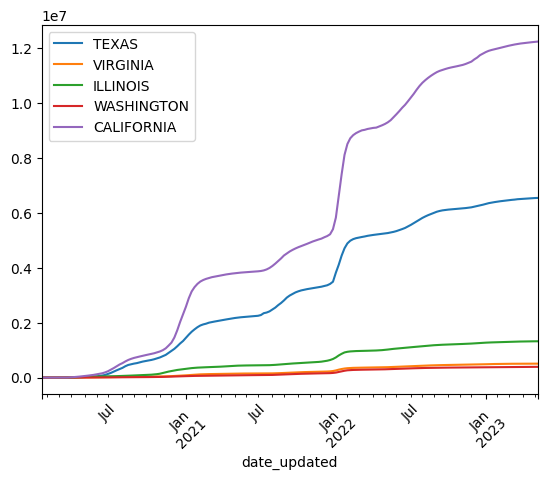

In [22]:
final_df.plot.line(rot=45)
